# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [2]:
### Your code here

# Load data
df = pd.read_csv('SeoulBikeData.csv')
df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes


In [3]:
# Summarise in text using one pandas function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Now, to visualize the data, we make a copy of entire dataframe and work on the new dataframe**

In [4]:
# Make a copy of the original data
df_vis = df.copy()

In [5]:
# Check the first few entries of the data
df_vis.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes


By observing the data, we can see there are **3 categorical features**: ***Seasons, Holiday, Functioning Day***, now we plot these 3 features using **pie chart** to see the category and the percentage of these categories.

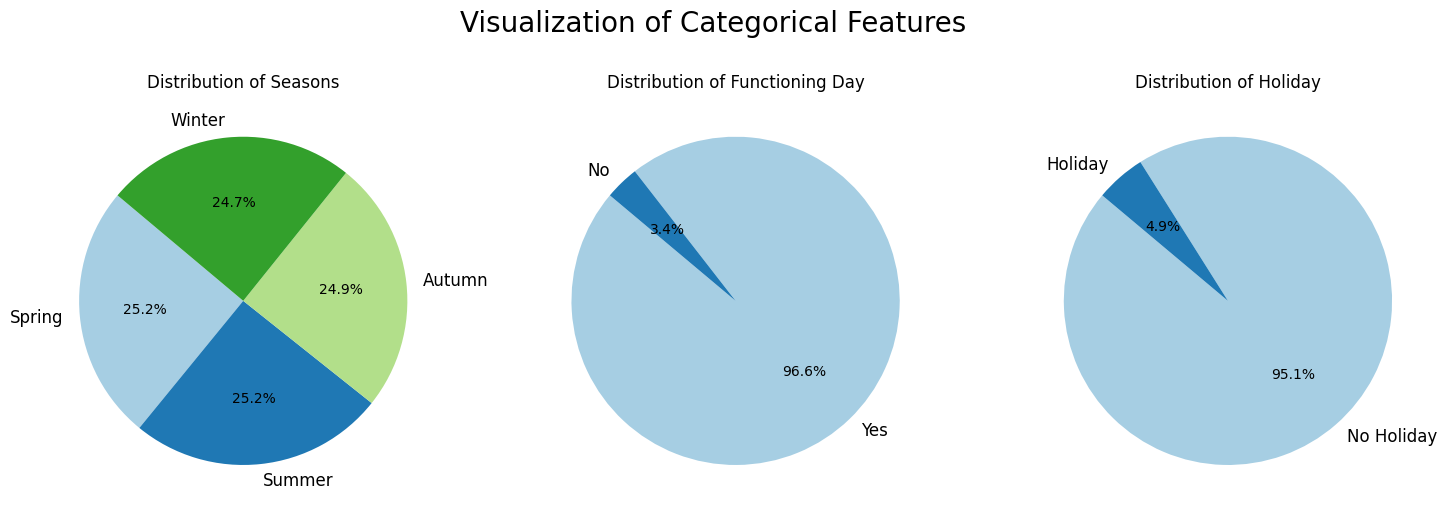

In [6]:
def plot_pie_charts(df, features, titles, big_title):
    _, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, feature in enumerate(features):
        counts = df[feature].value_counts()
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))
        axes[i].set_title(titles[i])
    plt.suptitle(big_title, fontsize=20)
    plt.show()

# Features to plot and their titles
features = ['Seasons', 'Functioning Day', 'Holiday']
titles = ['Distribution of Seasons', 'Distribution of Functioning Day', 'Distribution of Holiday']
big_title = 'Visualization of Categorical Features'

# Plot the pie charts
plot_pie_charts(df_vis, features, titles, big_title)

Now, we try to plot the numerical values in histogram, however, from the summary of the data (`df.info()`) and the actual data rows (`df_vis.head()`), we can see that there are 3 features are actually numerical feature but due to some error inside the data, they are considered as object, which is categorical features. The 3 features are: ***Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm)***. So now we try to convert the feature value to numeric using `pd.to_numeric()`, then we finally plot all the numerical feature.

In [7]:
# Convert to numerical value
numeric_columns = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for column in numeric_columns:
    df_vis[column] = pd.to_numeric(df_vis[column], errors='coerce')

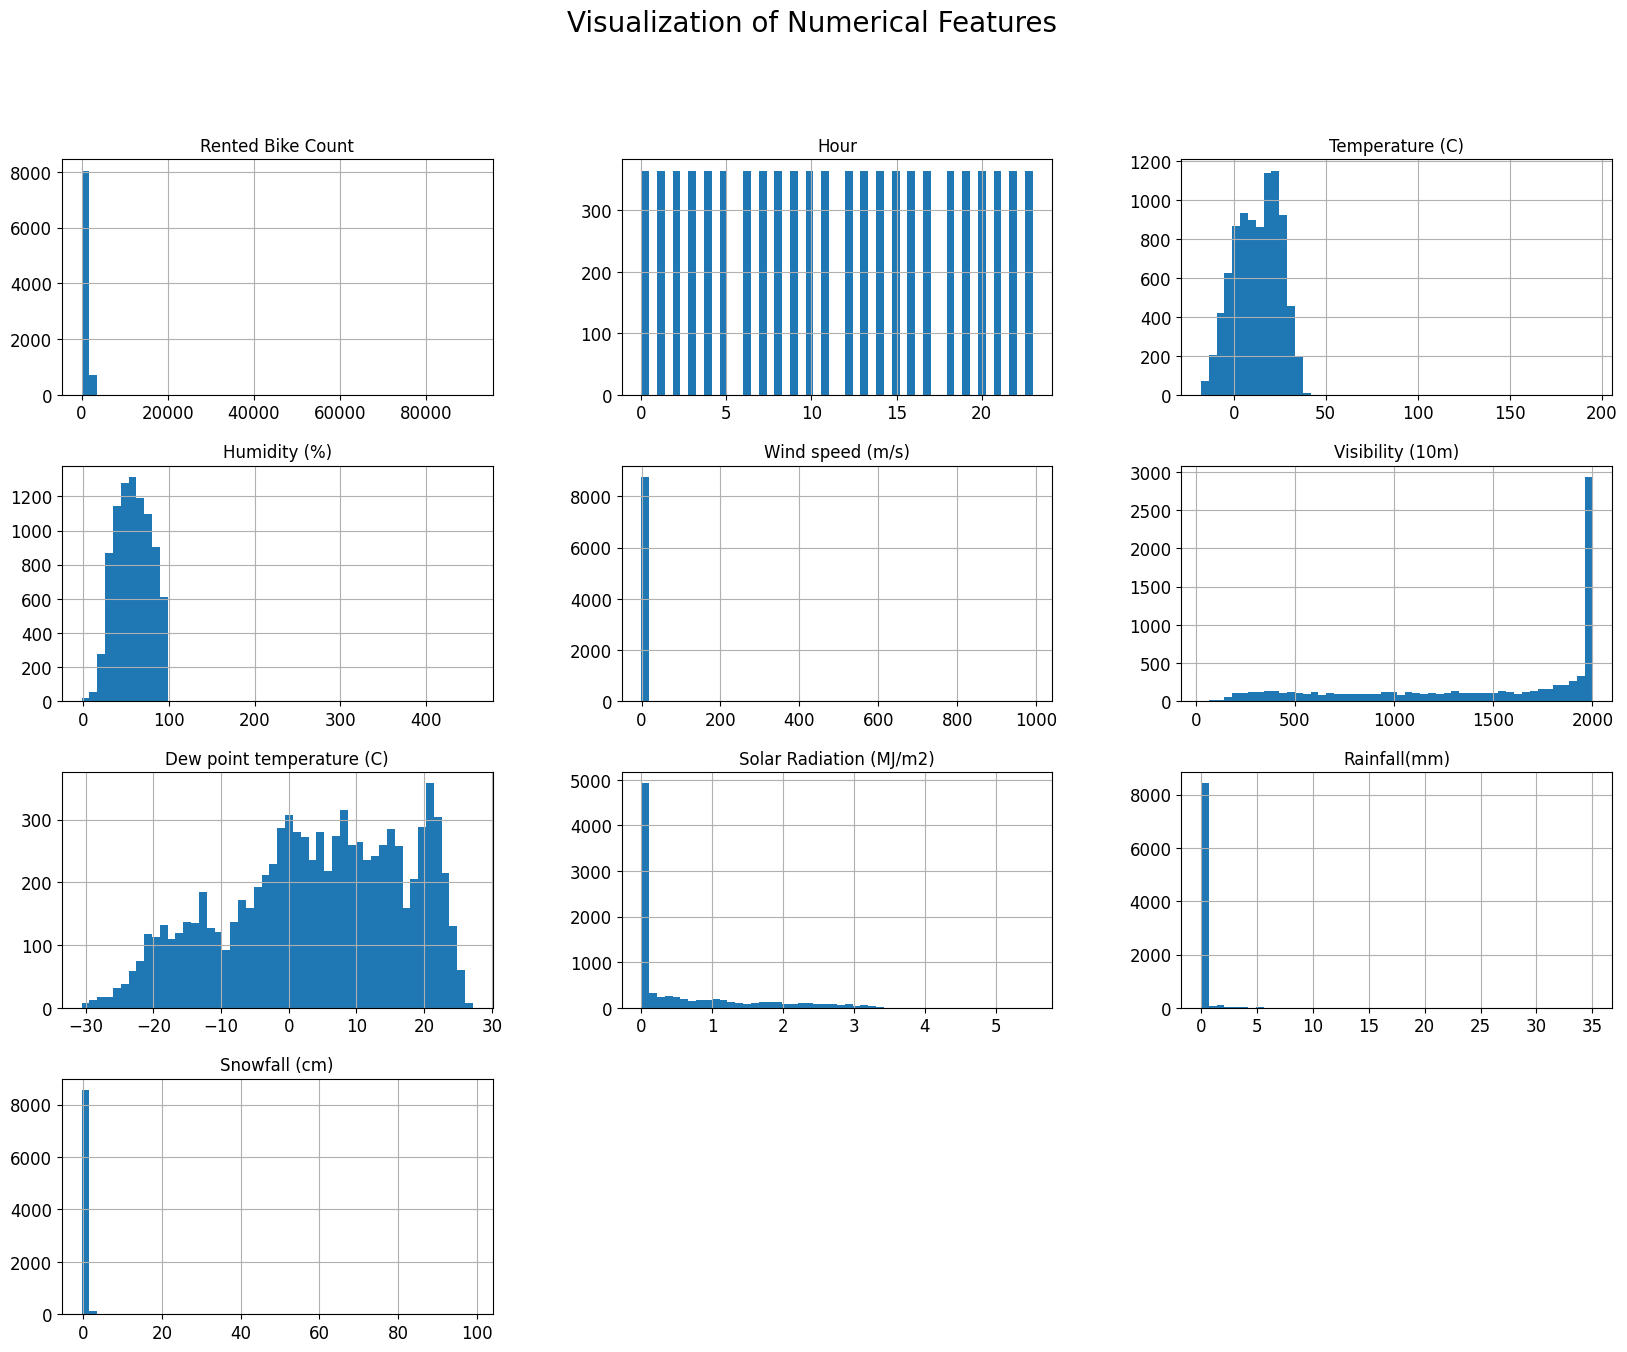

In [8]:
# Plot numerical features
df_vis.hist(bins=50, figsize=(20, 15))
plt.suptitle('Visualization of Numerical Features', fontsize=20)
plt.show()

The last feature we need to visualize, Date, is a little bit more weird compare to other features. First we need to convert the Date column to datetime type using `pd.to_datetime()`, and then we plot it in a histogram to see the frequency of each day appear in the dataframe

In [9]:
# Convert 'Date' column to datetime
df_vis['Date'] = pd.to_datetime(df_vis['Date'], dayfirst=True)

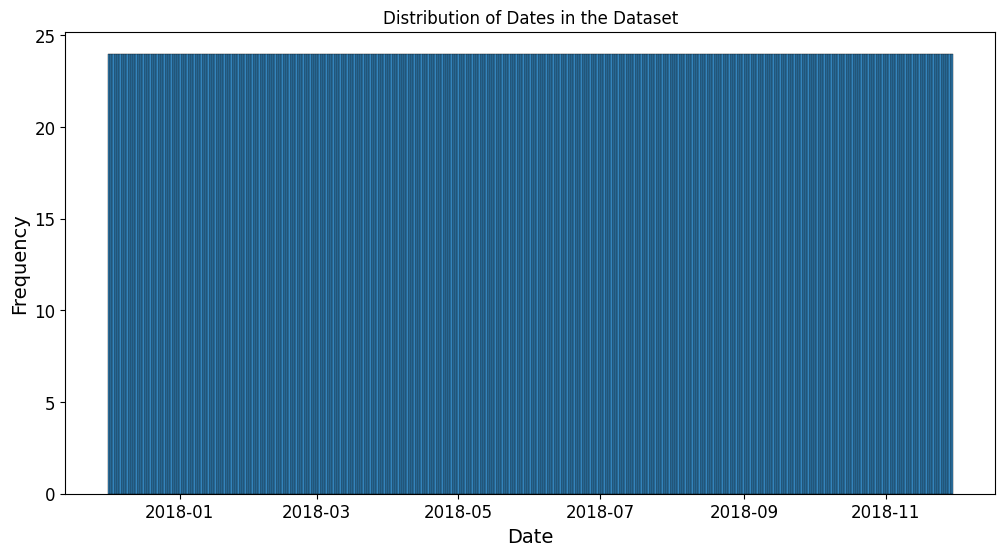

In [10]:
# Plot Date as a histogram
plt.figure(figsize=(12, 6))
plt.hist(df_vis['Date'], bins=len(df_vis['Date'].unique()), edgecolor='black', linewidth = 0.3, alpha=0.9)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Dates in the Dataset')
plt.show()

We can see the Date feature contains the day between the end of 2017 till the end of 2018, a whole year range, with equal frequency for each day (24).

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [11]:
## Example code for weekday feature mapping ##

import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

#### 1.2.1 Remove non-functioning day and delete Functioning Day feature

In [12]:
### Your code here (and remember to upload the resulting csv)

# Remove rows where the business is closed and delete the "Functioning Day" feature

df = df[df['Functioning Day'] == 'Yes']
df.drop(columns=['Functioning Day'], inplace=True)

#### 1.2.2 Convert seasons to a one hot encoded format

In [13]:
# Convert Seasons to one-hot encoded format

df = pd.get_dummies(df, columns=['Seasons'])

#### 1.2.3 Replace the Date feature with a binary Weekday feature

In [14]:
# Replace the Weekday feature with a binary weekday feature

df['Weekday'] = df['Date'].apply(date_is_weekday)

df.drop(columns=['Date'], inplace=True)

#### 1.2.4 Convert remaining non-numerical features to a numerical format

Firstly let's see which columns are still non-numerical features

In [15]:
# Show non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

print(non_numeric_columns)

Index(['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')


Based on the summary of data(`df.info()`) and the non-numerical columns, there are 3 steps for us to convert those non-numerical features:
1. convert Holiday feature (since it's actually a binary feature)
2. convert 4 season column (since they are bool type)
3. convert the rest features (since they are actually numerical feature but due to some error in the data it treated as categorical feature)

In [16]:
# Check Holiday object value

df['Holiday'].value_counts()

Holiday
No Holiday    8057
Holiday        408
Name: count, dtype: int64

In [17]:
# Convert Holiday feature to numerical format

df['Holiday'] = df['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

In [18]:
# Convert the one-hot encoded "Seasons" columns from bool to int

season_columns = ['Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']
for column in season_columns:
    df[column] = df[column].astype(int)

In [19]:
# Convert specific features to numeric, replacing non-convertible values with NaN
numeric_columns = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

#### 1.2.5 Identify and fix any outliers and errors in the data

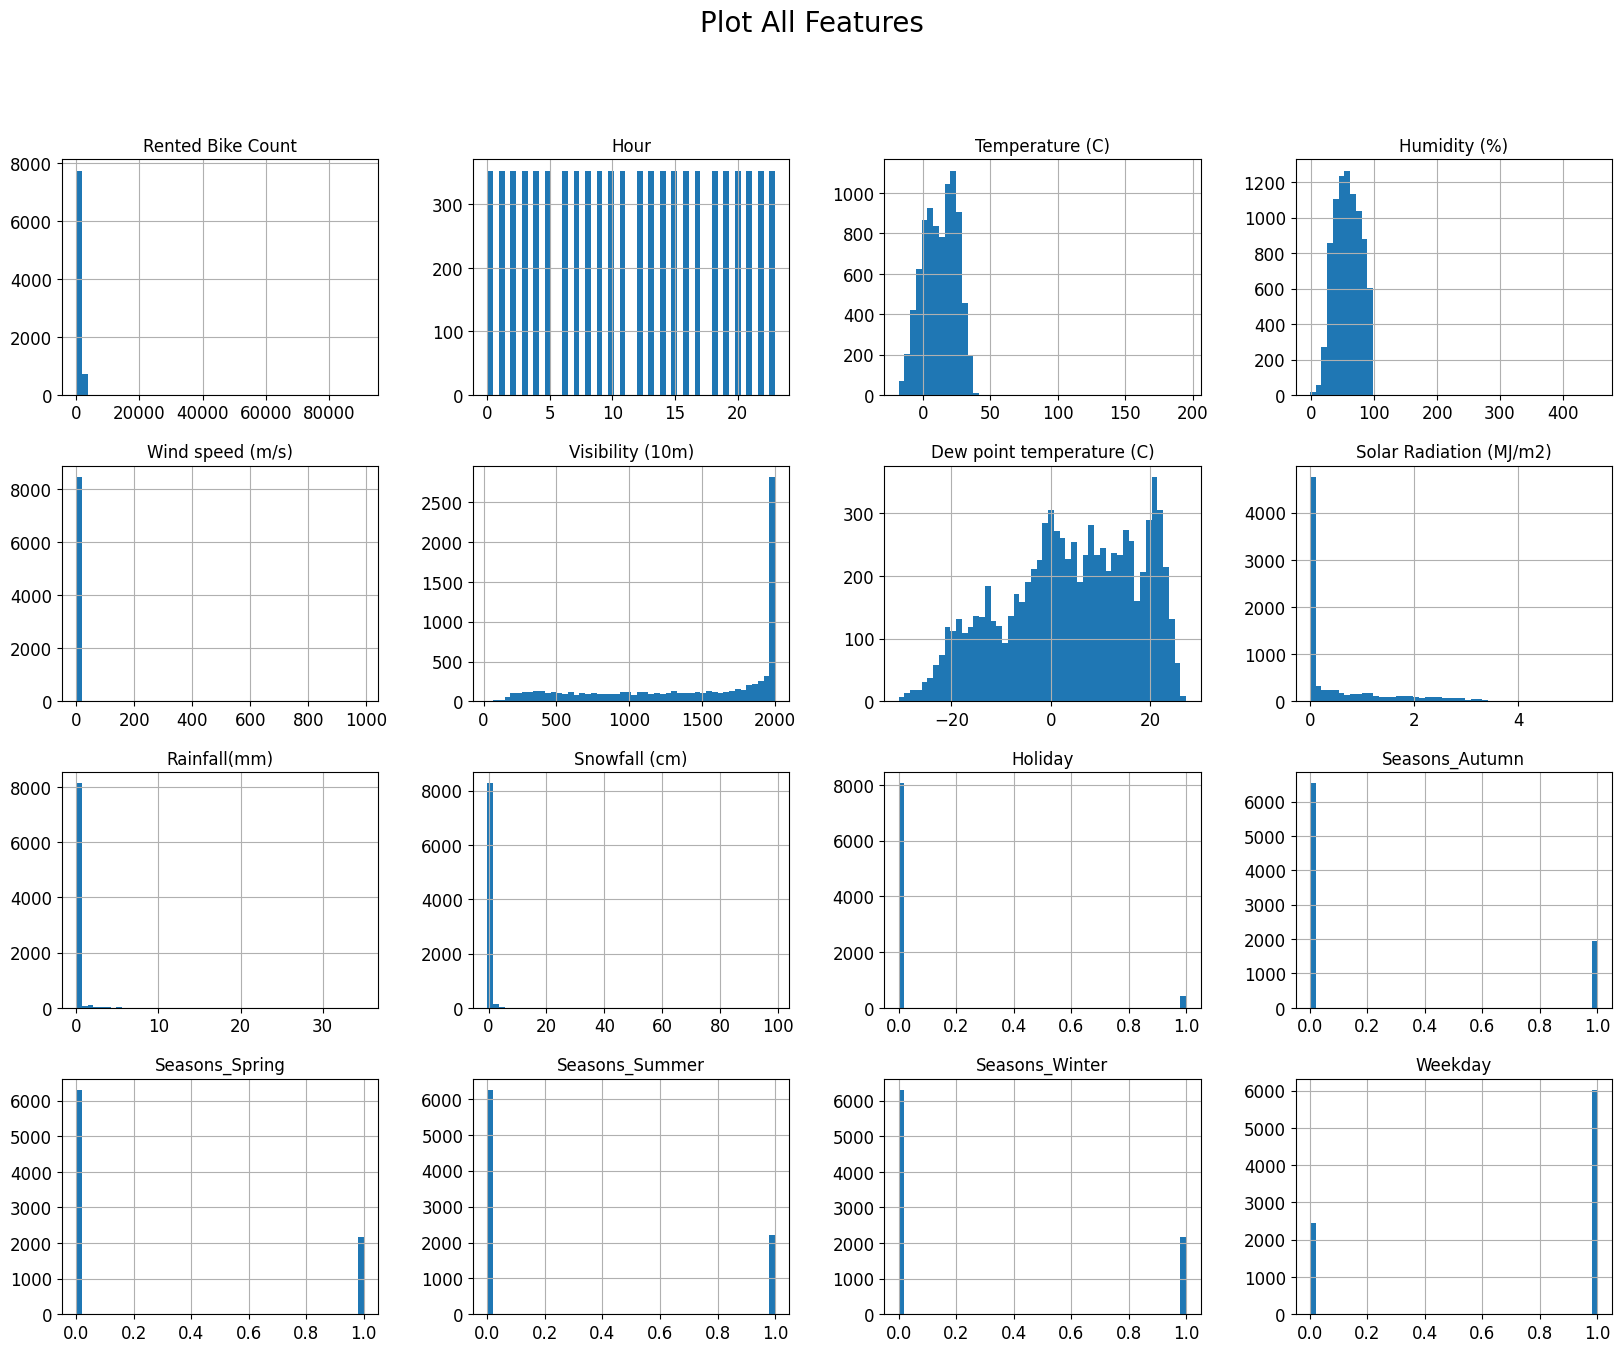

In [20]:
# Plot all the features
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Plot All Features', fontsize=20)
plt.show()

In [21]:
# Check the statistical description of data
df.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8464.000000,8444.000000,8444.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,739.789014,11.507029,12.836090,58.190408,1.854247,1433.873479,3.944997,0.567771,0.149491,0.089507,0.048198,0.228825,0.255168,0.260839,0.255168,0.711636
std,1172.685973,6.920899,12.545382,20.943092,10.847528,609.051229,13.242399,0.868830,1.126914,1.164716,0.214198,0.420101,0.435982,0.439118,0.435982,0.453028
min,2.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000,0.000000,0.000000,-0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000,5.520000,35.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observation of the data features:**

From the above histograms and the statistical description of all the features, we found that there are some features contain outlier or error value possibly, as we can see the feature **Rented Bike Count** mainly has value less than 10000, but the max of this feature is 90997. Other features like **Temperature (C), Humidity (%), Wind speed (m/s), Visibility (10m), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm)** since their distribution are seriously skewed. 

The rest features like Hour, Dew point temperature, Seasons, Holiday, Weekday obviously contains no outlier since they are either normally distributed or they are originally categorical features.

So now we check the box plot and see the sorted data value to detect and remove outlier accurately.

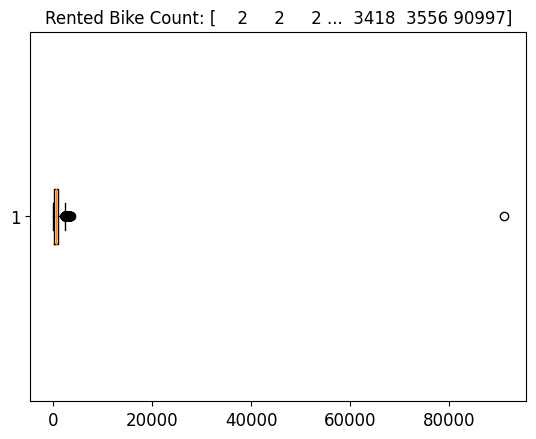

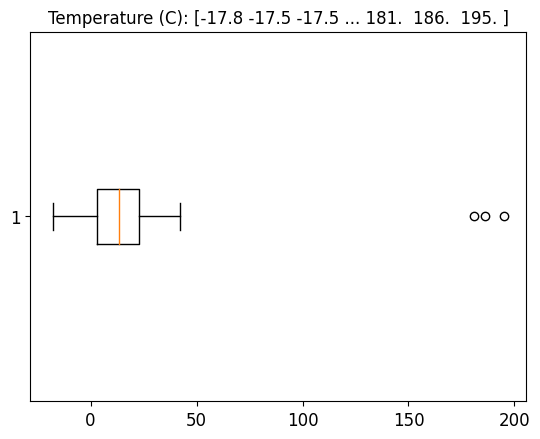

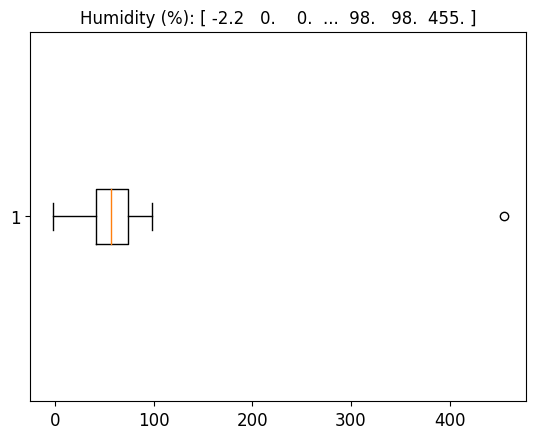

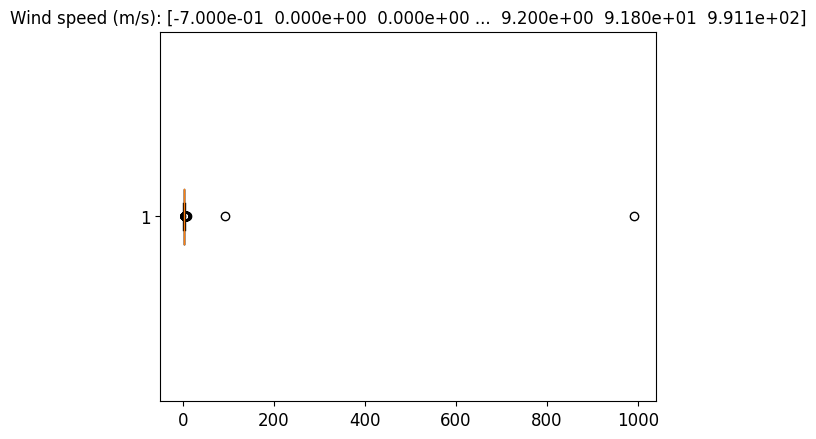

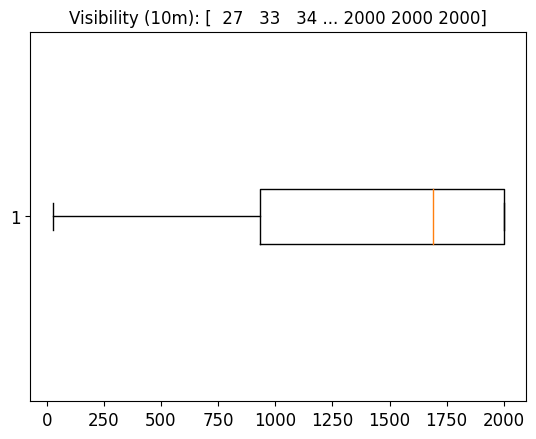

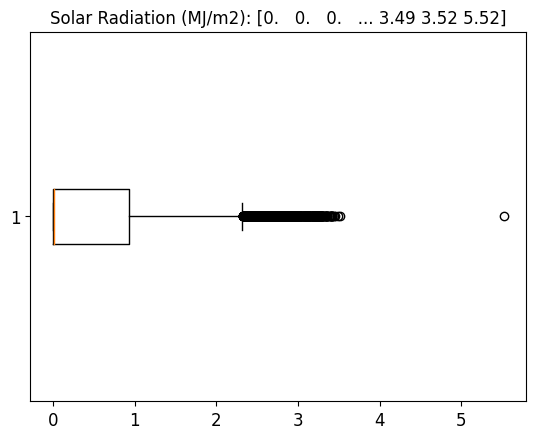

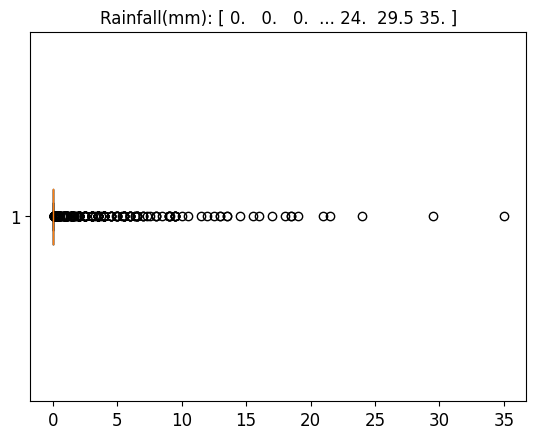

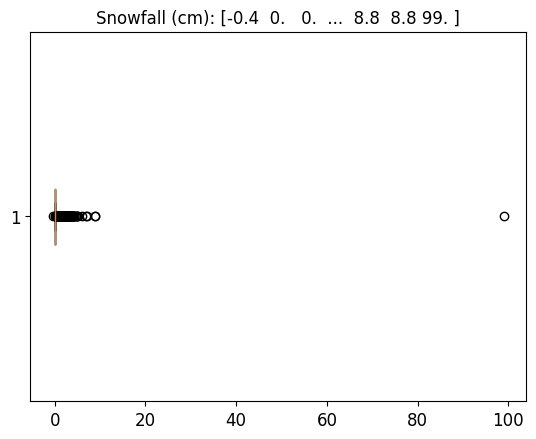

In [22]:
possile_error_columns = ['Rented Bike Count', 'Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Plot boxplots excluding NaN values
for feat in possile_error_columns:
    plt.boxplot(df[feat].dropna(), vert=False)
    plt.title(f'{feat}: {np.sort(df[feat].dropna())}')
    plt.show()

Observation of boxplot (identify the outliers):
- **Rented Bike Count**: we see the largest value of this feature is 90997 while the second largest value is 3556, obviously 90997 is an outlier, so we can set the value which greater than 10000 to nan of this feature.
- **Temperature (C)**: we see all the value are less than 100 except 3 largeest value (181, 186, 195), so they are outliers, then we can set the value which greater than 100 to nan of this feature.
- **Humidity (%)**: we see there's only one value greater than 100, and since humidity is in percentage, obviously larger than 100 is an error, then we can set the value which greater than 100 to nan of this feature.
- **Wind speed (m/s)**: we can see the wind speed are all smaller than 10 except two largest value, which are much larger than the rest value, so they are, thenwe can set the value which greater than 10 to nan of this feature.
- **Visibility (10m)**: we can see this feature does not contain apparent outliers
- **Solar Radiation (MJ/m2)**: we can see most of the data is 0, and others are all less than 4 except the largest one(5.52), so it's an outlier in this data, now we can set the value which greater than 4 to nan of this feature.
- **Rainfall (mm)**: we can see this feature does not contain apparent outliers
- **Snowfall (cm)**: we see there's only one value greater than 10 (99), and it's much larger than the rest, also it will be ridiculous if the snowfall in a day is 99 cm, obviously that is an outlier, then we can set the value which greater than 10 to nan of this feature.

In [23]:
# Fixing the identified outliers by replacing them to nan based on the above analysis

df.loc[df['Rented Bike Count'] > 10000, 'Rented Bike Count'] = np.nan
df.loc[df['Temperature (C)'] > 100, 'Temperature (C)'] = np.nan
df.loc[df['Humidity (%)'] > 100, 'Humidity (%)'] = np.nan
df.loc[df['Wind speed (m/s)'] > 10, 'Wind speed (m/s)'] = np.nan
df.loc[df['Solar Radiation (MJ/m2)'] > 4, 'Solar Radiation (MJ/m2)'] = np.nan
df.loc[df['Snowfall (cm)'] > 10, 'Snowfall (cm)'] = np.nan

After dealing with outlier let's check the histogram and the statistical description again of all features.

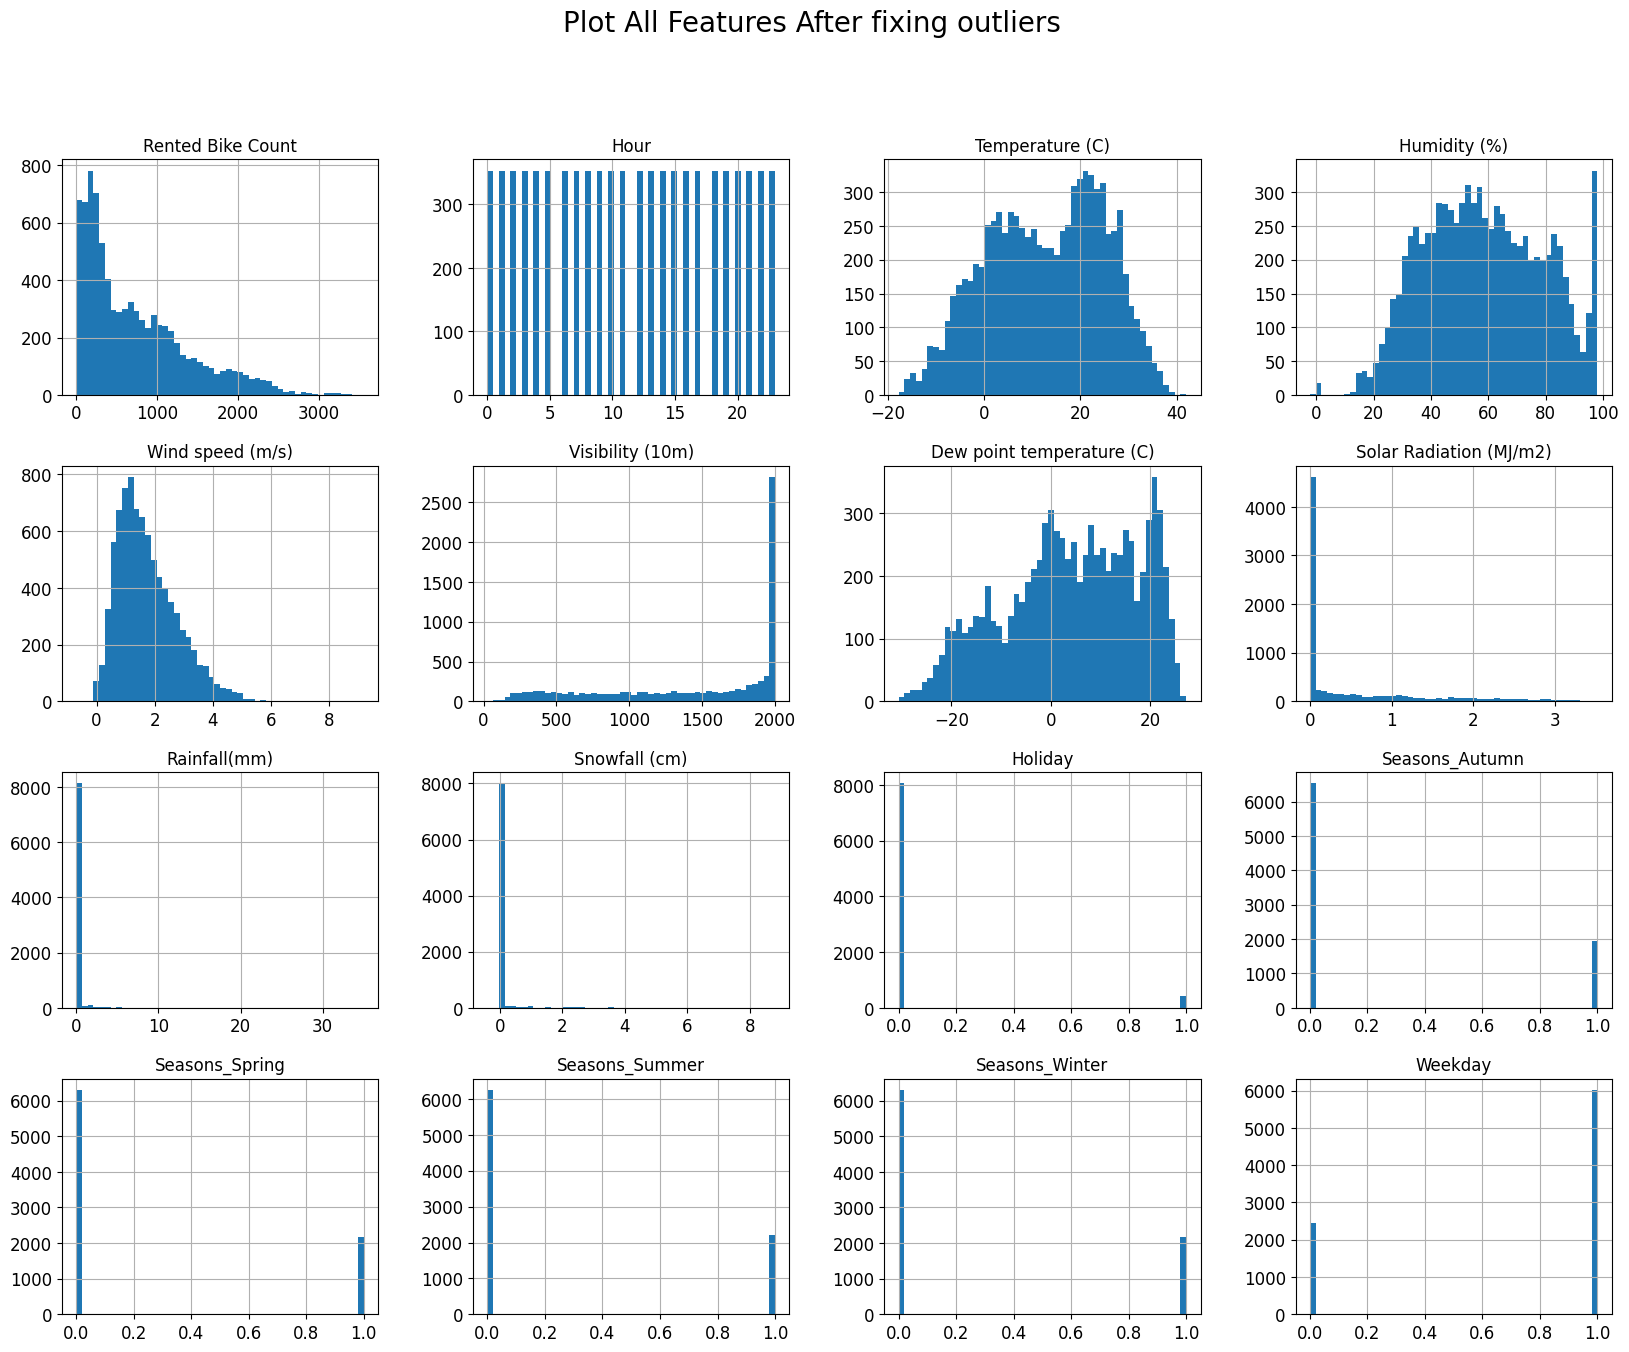

In [24]:
# Plot all the features again
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Plot All Features After fixing outliers', fontsize=20)
plt.show()

In [25]:
# Check the statistical description of data again
df.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday
count,8464.000000,8465.000000,8462.000000,8464.000000,8463.000000,8465.000000,8465.000000,8463.000000,8444.000000,8443.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,729.125354,11.507029,12.774226,58.143526,1.726728,1433.873479,3.944997,0.567185,0.149491,0.077792,0.048198,0.228825,0.255168,0.260839,0.255168,0.711636
std,642.382517,6.920899,12.109102,20.495299,1.037826,609.051229,13.242399,0.867212,1.126914,0.444640,0.214198,0.420101,0.435982,0.439118,0.435982,0.453028
min,2.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000,0.000000,0.000000,-0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,3556.000000,23.000000,42.000000,98.000000,9.200000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see now the data is properly distributed without outliers and the data is finally cleaned.

Now we can save the cleaned data into new csv file.

In [26]:
# Check the final summary of the cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8464 non-null   float64
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8462 non-null   float64
 3   Humidity (%)               8464 non-null   float64
 4   Wind speed (m/s)           8463 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8463 non-null   float64
 8   Rainfall(mm)               8444 non-null   float64
 9   Snowfall (cm)              8443 non-null   float64
 10  Holiday                    8465 non-null   int64  
 11  Seasons_Autumn             8465 non-null   int32  
 12  Seasons_Spring             8465 non-null   int32  
 13  Seasons_Summer             8465 non-null   int32  
 1

In [27]:
# Save the cleaned data to a new CSV file
cleaned_file_path = 'CleanedSeoulBikeData.csv'
df.to_csv(cleaned_file_path, index=False)

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [35]:
### Your code here

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create a pipeline for imputation and scaling
preprocess_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])


### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [38]:
### Your code and outputs here

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separate features and target
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocess_pipeline),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training data
y_train_pred = pipeline.predict(X_train)

# Calculate RMSE for the training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'Training RMSE: {rmse_train:.2f}')

# Baseline model: Mean of training targets
baseline_pred = np.full_like(y_train, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_train, baseline_pred))
print(f'Baseline RMSE: {baseline_rmse:.2f}')

Training RMSE: 437.26
Baseline RMSE: 646.17


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


In [30]:
### Your ChatGPT prompt


In [31]:
### Code here (with outputs)


## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

In [32]:
### Your answer here (maximum of 200 words)
